# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data**

## Import Data

In [2]:
df = pd.read_csv(r"D:\Samuel\Open Datasets\Fraud Detection using AI-ML\AIML Dataset.csv")
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2345523,189,TRANSFER,30151.10,C2043199796,1222.0,0.0,C1827624480,0.00,30151.10,0,0
6267564,617,PAYMENT,6725.61,C1016871671,0.0,0.0,M16882191,0.00,0.00,0,0
4162204,304,CASH_OUT,103012.08,C1468979835,0.0,0.0,C1434052156,485718.66,588730.74,0,0
1599927,156,PAYMENT,15414.71,C511116464,0.0,0.0,M1368531885,0.00,0.00,0,0
4600522,329,CASH_OUT,12296.86,C1669278560,0.0,0.0,C935764423,75558.34,87855.20,0,0


## Data Exploration

In [3]:
print(df.shape)
df.info()

(6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.shape[0]

6362620

In [13]:
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

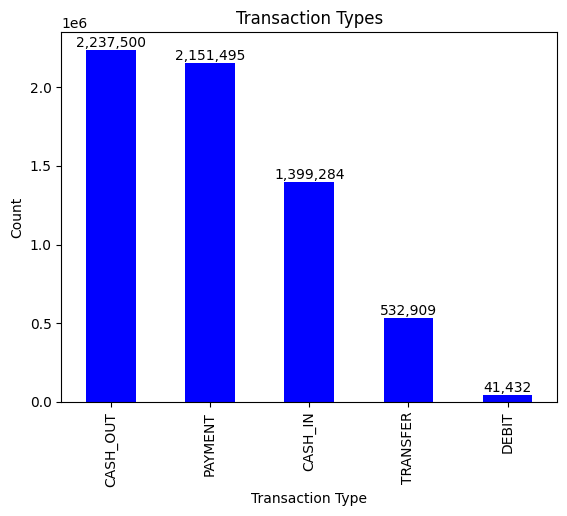

In [25]:
ax = df['type'].value_counts().plot(kind='bar', title="Transaction Types", color='blue')

labels = [f"{int(v.get_height()):,}" for v in ax.containers[0]]
ax.bar_label(ax.containers[0], labels=labels)

plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

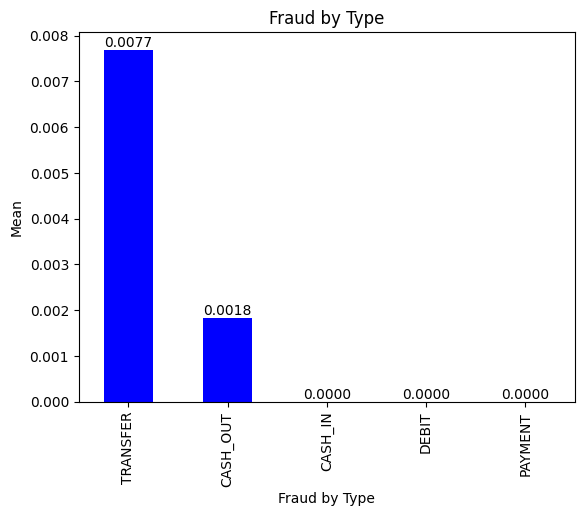

In [30]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

ax = fraud_by_type.plot(kind='bar', title="Fraud by Type", color='blue')

labels = [f"{v.get_height():.4f}" for v in ax.containers[0]]
ax.bar_label(ax.containers[0], labels=labels)

plt.xlabel("Fraud by Type")
plt.ylabel("Mean")
plt.show()

In [32]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

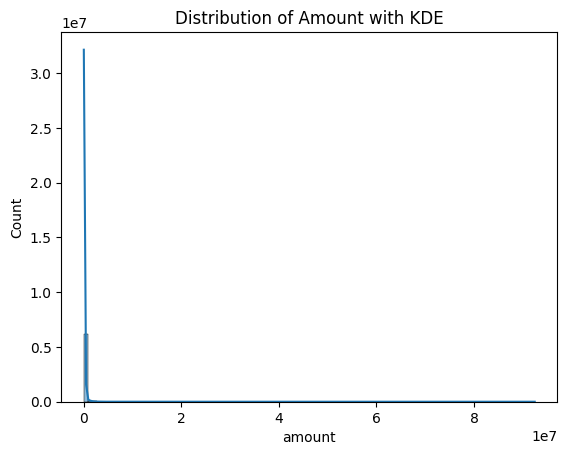

In [37]:
sns.histplot(df['amount'], kde=True, bins=100)
plt.title("Distribution of Amount with KDE")
plt.show()

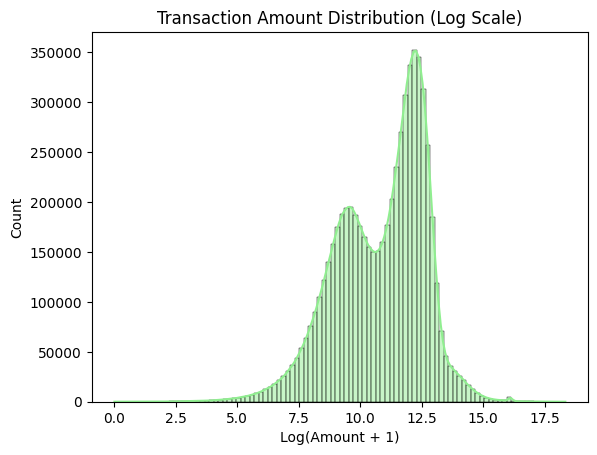

In [36]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='lightgreen')
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

In [34]:
from scipy.stats import skew, probplot

def check_skewness(series, bins=30):
    """
    Visualisasi distribusi data untuk mengecek skewness.
    Menampilkan Histogram+KDE, Boxplot, QQ Plot, dan nilai skewness.
    
    Parameters
    ----------
    series : pandas.Series
        Data numerik yang akan dianalisis
    bins : int
        Jumlah bin untuk histogram
    """
    data = series.dropna()  # buang missing values
    skewness = skew(data)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Histogram + KDE
    sns.histplot(data, kde=True, bins=bins, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram + KDE\nSkewness = {skewness:.2f}")
    axes[0].set_xlabel(series.name)
    axes[0].set_ylabel("Frequency")

    # 2. Boxplot
    sns.boxplot(x=data, ax=axes[1], color="lightgreen")
    axes[1].set_title("Boxplot")

    # 3. QQ Plot
    probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title("Q-Q Plot (Normal Distribution)")

    plt.tight_layout()
    plt.show()


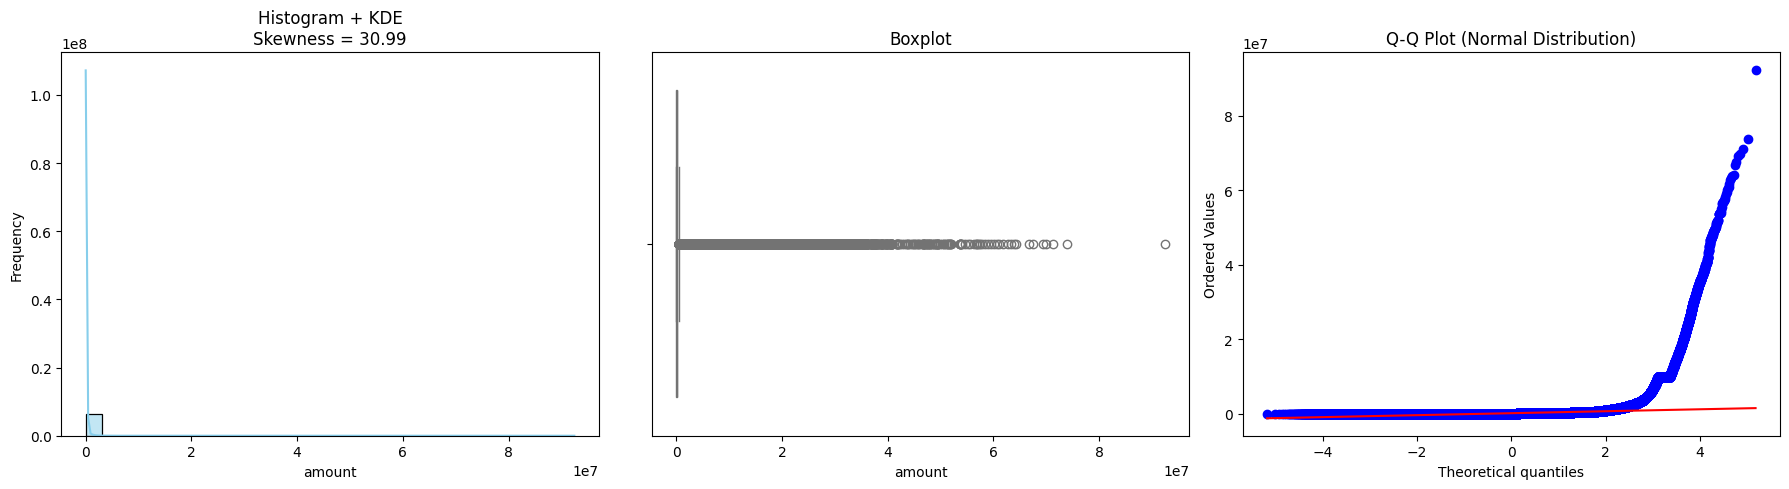

In [35]:
check_skewness(df['amount'])